<a href="https://www.kaggle.com/code/ahmedmoneimm/yolov8-drowsiness-detection?scriptVersionId=131502093" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# to make sure we have access on the gpu
!nvidia-smi

Mon May 29 21:33:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Adjust HOME path

In [2]:
import os
HOME = os.getcwd()

print(HOME)

/kaggle/working


## Pls enter paths here

In [3]:
dataset_path = '/kaggle/input/drowsiness-dataset'

original_yaml_file = '/kaggle/input/drowsiness-dataset/Drowsiness Detection.v2-augmented-v1.yolov8/data.yaml'
new_yaml_file = f'{HOME}/custom_data.yaml'


# take it copy paste, msh lazem f'{dataset_path}/test/images'
test_images_path =  '/kaggle/input/drowsiness-dataset/Drowsiness Detection.v2-augmented-v1.yolov8/test/images'
train_images_path = '/kaggle/input/drowsiness-dataset/Drowsiness Detection.v2-augmented-v1.yolov8/train/images'
val_images_path = '/kaggle/input/drowsiness-dataset/Drowsiness Detection.v2-augmented-v1.yolov8/valid/images'

# make a function that creates custom_yaml with the correct paths and use it in model.train() instead of the one in the dataset

In [4]:
import yaml

# Load the original YAML file
with open(original_yaml_file, 'r') as file:
    data = yaml.safe_load(file)

# Update the paths in the loaded data
data['test'] = test_images_path
data['val'] = val_images_path
data['train'] = train_images_path

# Save the modified data to a new YAML file
with open(new_yaml_file, 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

In [5]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()
from ultralytics import YOLO

Ultralytics YOLOv8.0.110 🚀 Python-3.10.10 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Setup complete ✅ (2 CPUs, 15.6 GB RAM, 4726.0/8062.4 GB disk)


# **Model Training**

In [6]:
import os
os.environ['WANDB_DISABLED'] = 'true'

In [7]:
model_path: str = f'{HOME}/yolov8m.pt'
    
model = YOLO(model_path)

results = model.train(
    data=new_yaml_file,
    conf=0.25,
    iou=0.45, # wanna try conf=0.3,iou=0.45
    epochs=150,
    batch=32,
    imgsz=480,  # Decreased image size
    optimizer='Adam',
    lrf=0.0001,
    lr0=0.01,
    save=True,
    momentum=0.8,
    amp=False
)

100%|██████████| 49.7M/49.7M [00:00<00:00, 61.7MB/s]
Ultralytics YOLOv8.0.110 🚀 Python-3.10.10 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
yolo/engine/trainer: task=detect, mode=train, model=/kaggle/working/yolov8m.pt, data=/kaggle/working/custom_data.yaml, epochs=150, patience=50, batch=32, imgsz=480, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=False, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.25, iou=0.45, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fa

In [8]:
get_ipython().system('LC_ALL=C.UTF-8 ls {HOME}/runs/detect/train/')

F1_curve.png					  results.csv
PR_curve.png					  results.png
P_curve.png					  train_batch0.jpg
R_curve.png					  train_batch1.jpg
args.yaml					  train_batch2.jpg
confusion_matrix.png				  val_batch0_labels.jpg
confusion_matrix_normalized.png			  val_batch0_pred.jpg
events.out.tfevents.1685396074.b4afa2d5b6e8.23.0  val_batch1_labels.jpg
labels.jpg					  val_batch1_pred.jpg
labels_correlogram.jpg				  weights


In [9]:
!ls {HOME}/runs/detect/train/

F1_curve.png					  results.csv
PR_curve.png					  results.png
P_curve.png					  train_batch0.jpg
R_curve.png					  train_batch1.jpg
args.yaml					  train_batch2.jpg
confusion_matrix.png				  val_batch0_labels.jpg
confusion_matrix_normalized.png			  val_batch0_pred.jpg
events.out.tfevents.1685396074.b4afa2d5b6e8.23.0  val_batch1_labels.jpg
labels.jpg					  val_batch1_pred.jpg
labels_correlogram.jpg				  weights


/kaggle/working


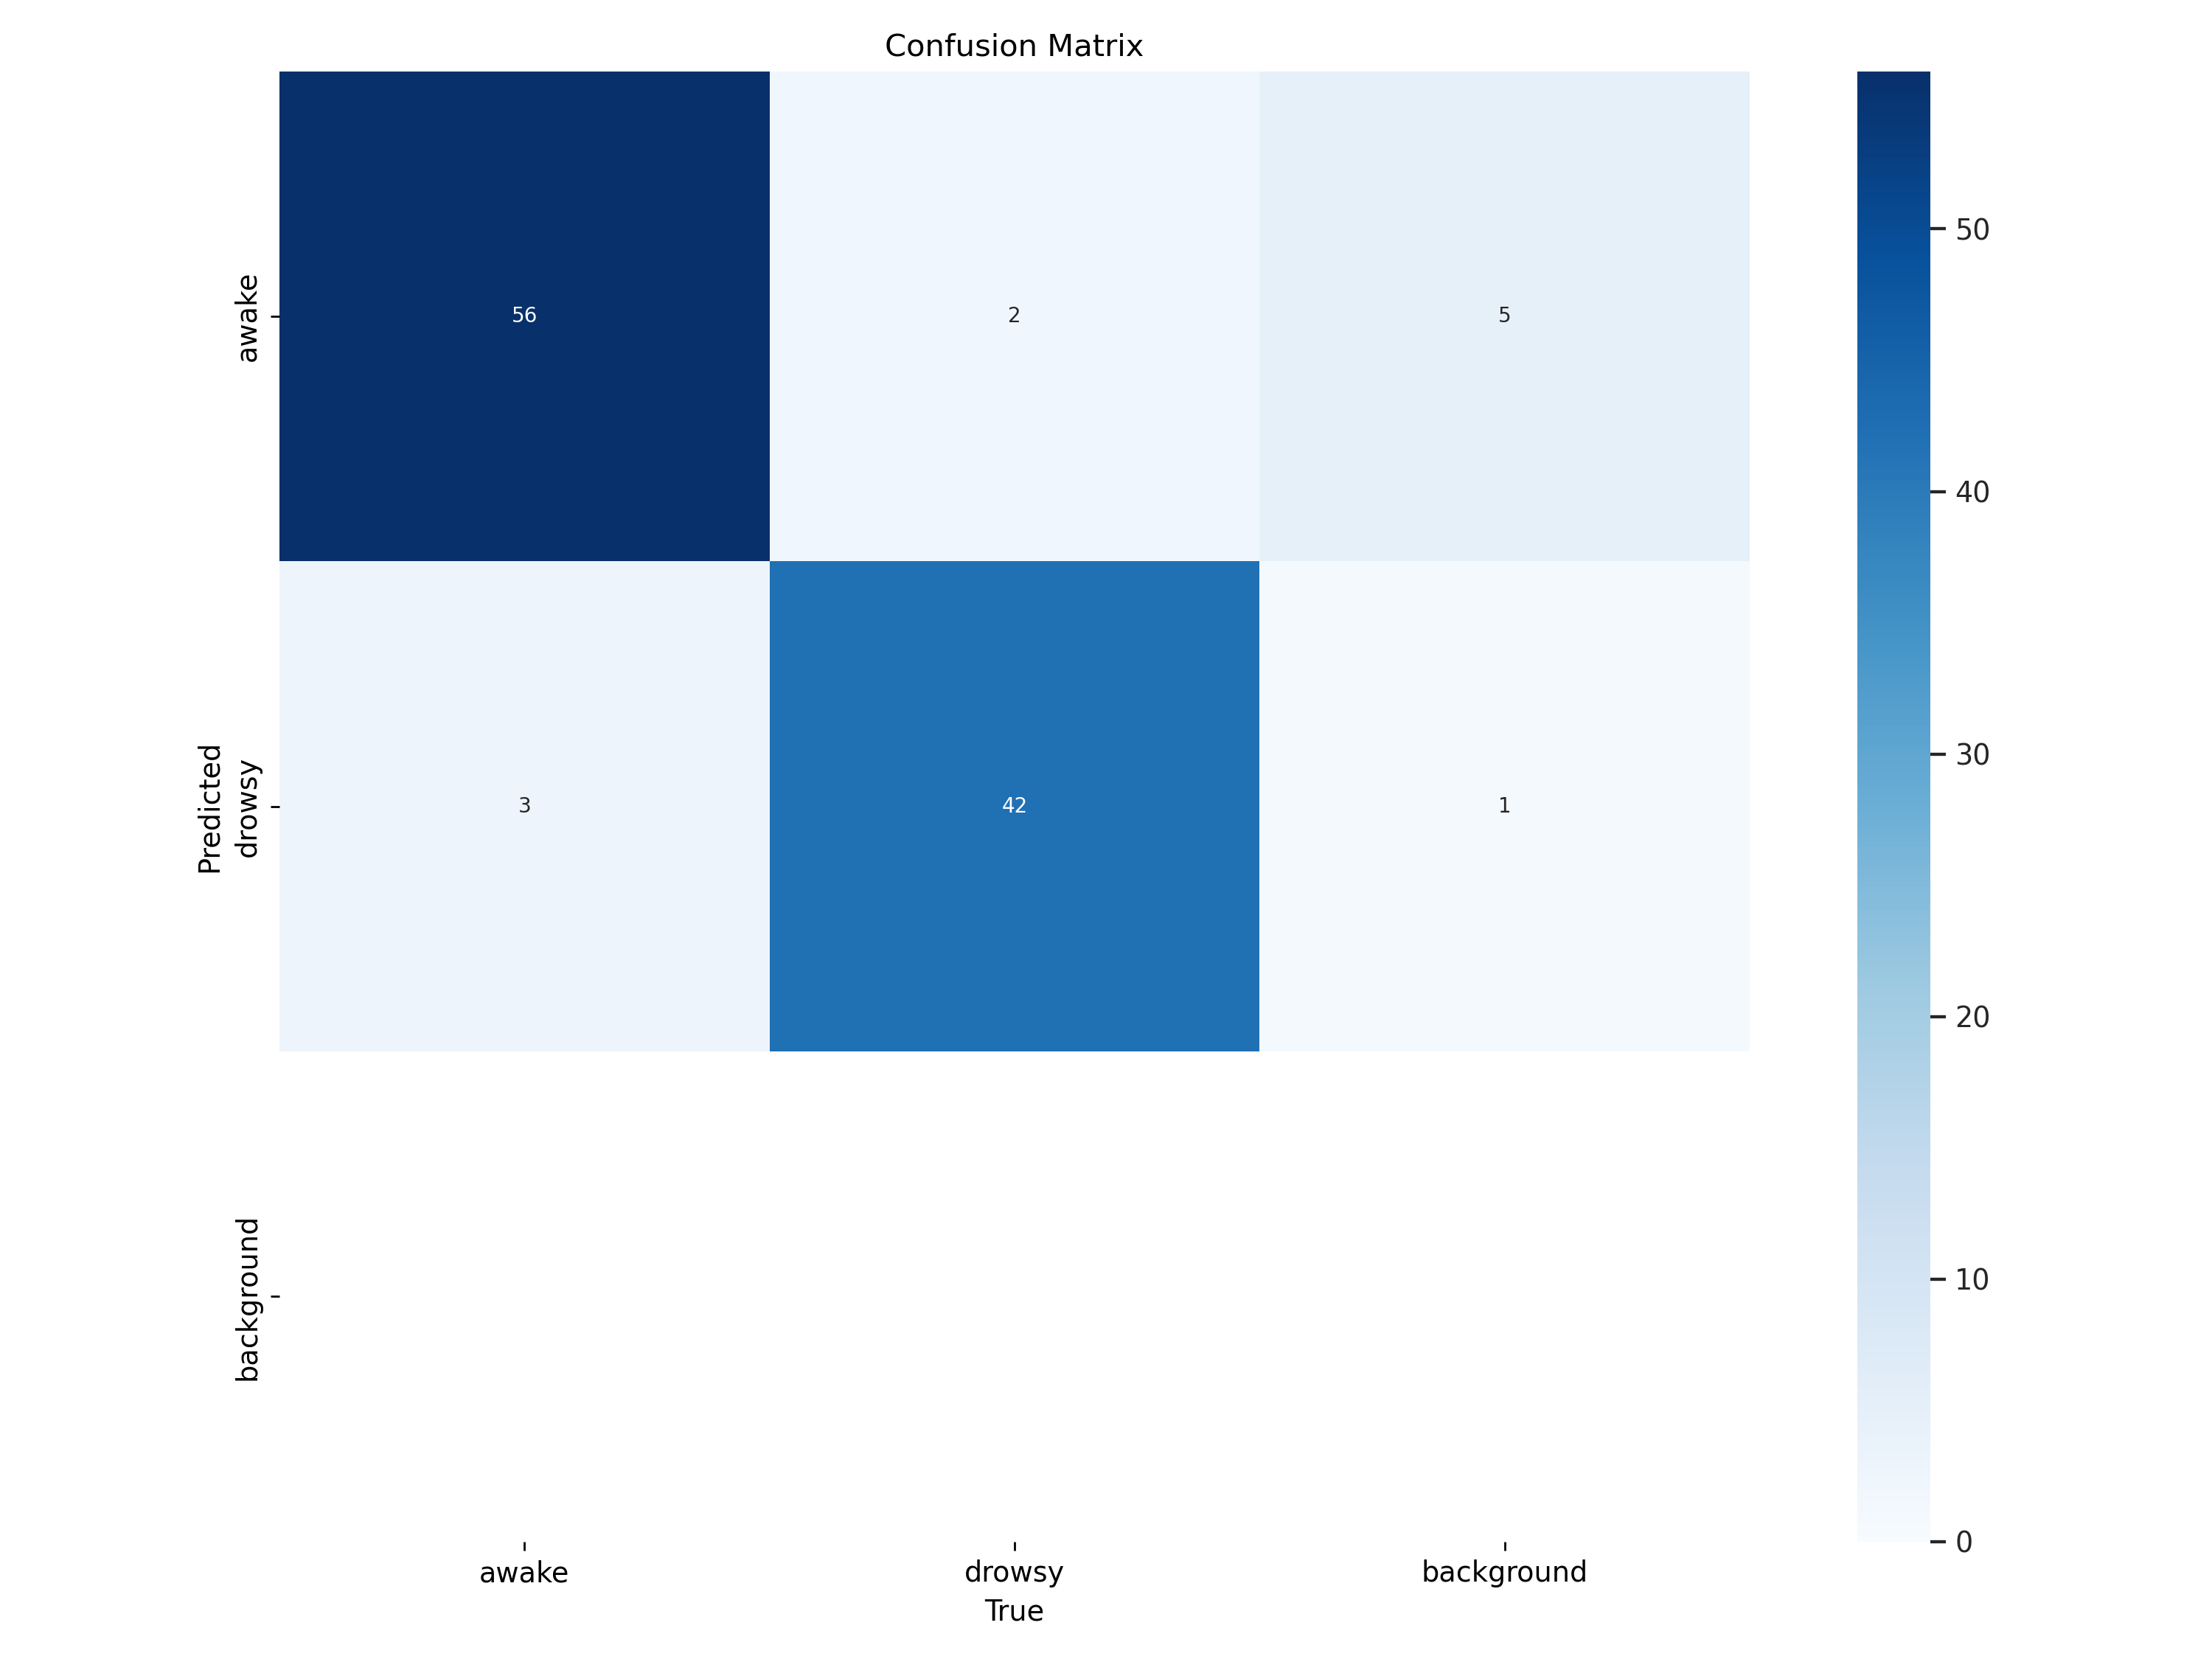

In [10]:
%cd {HOME}
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/kaggle/working


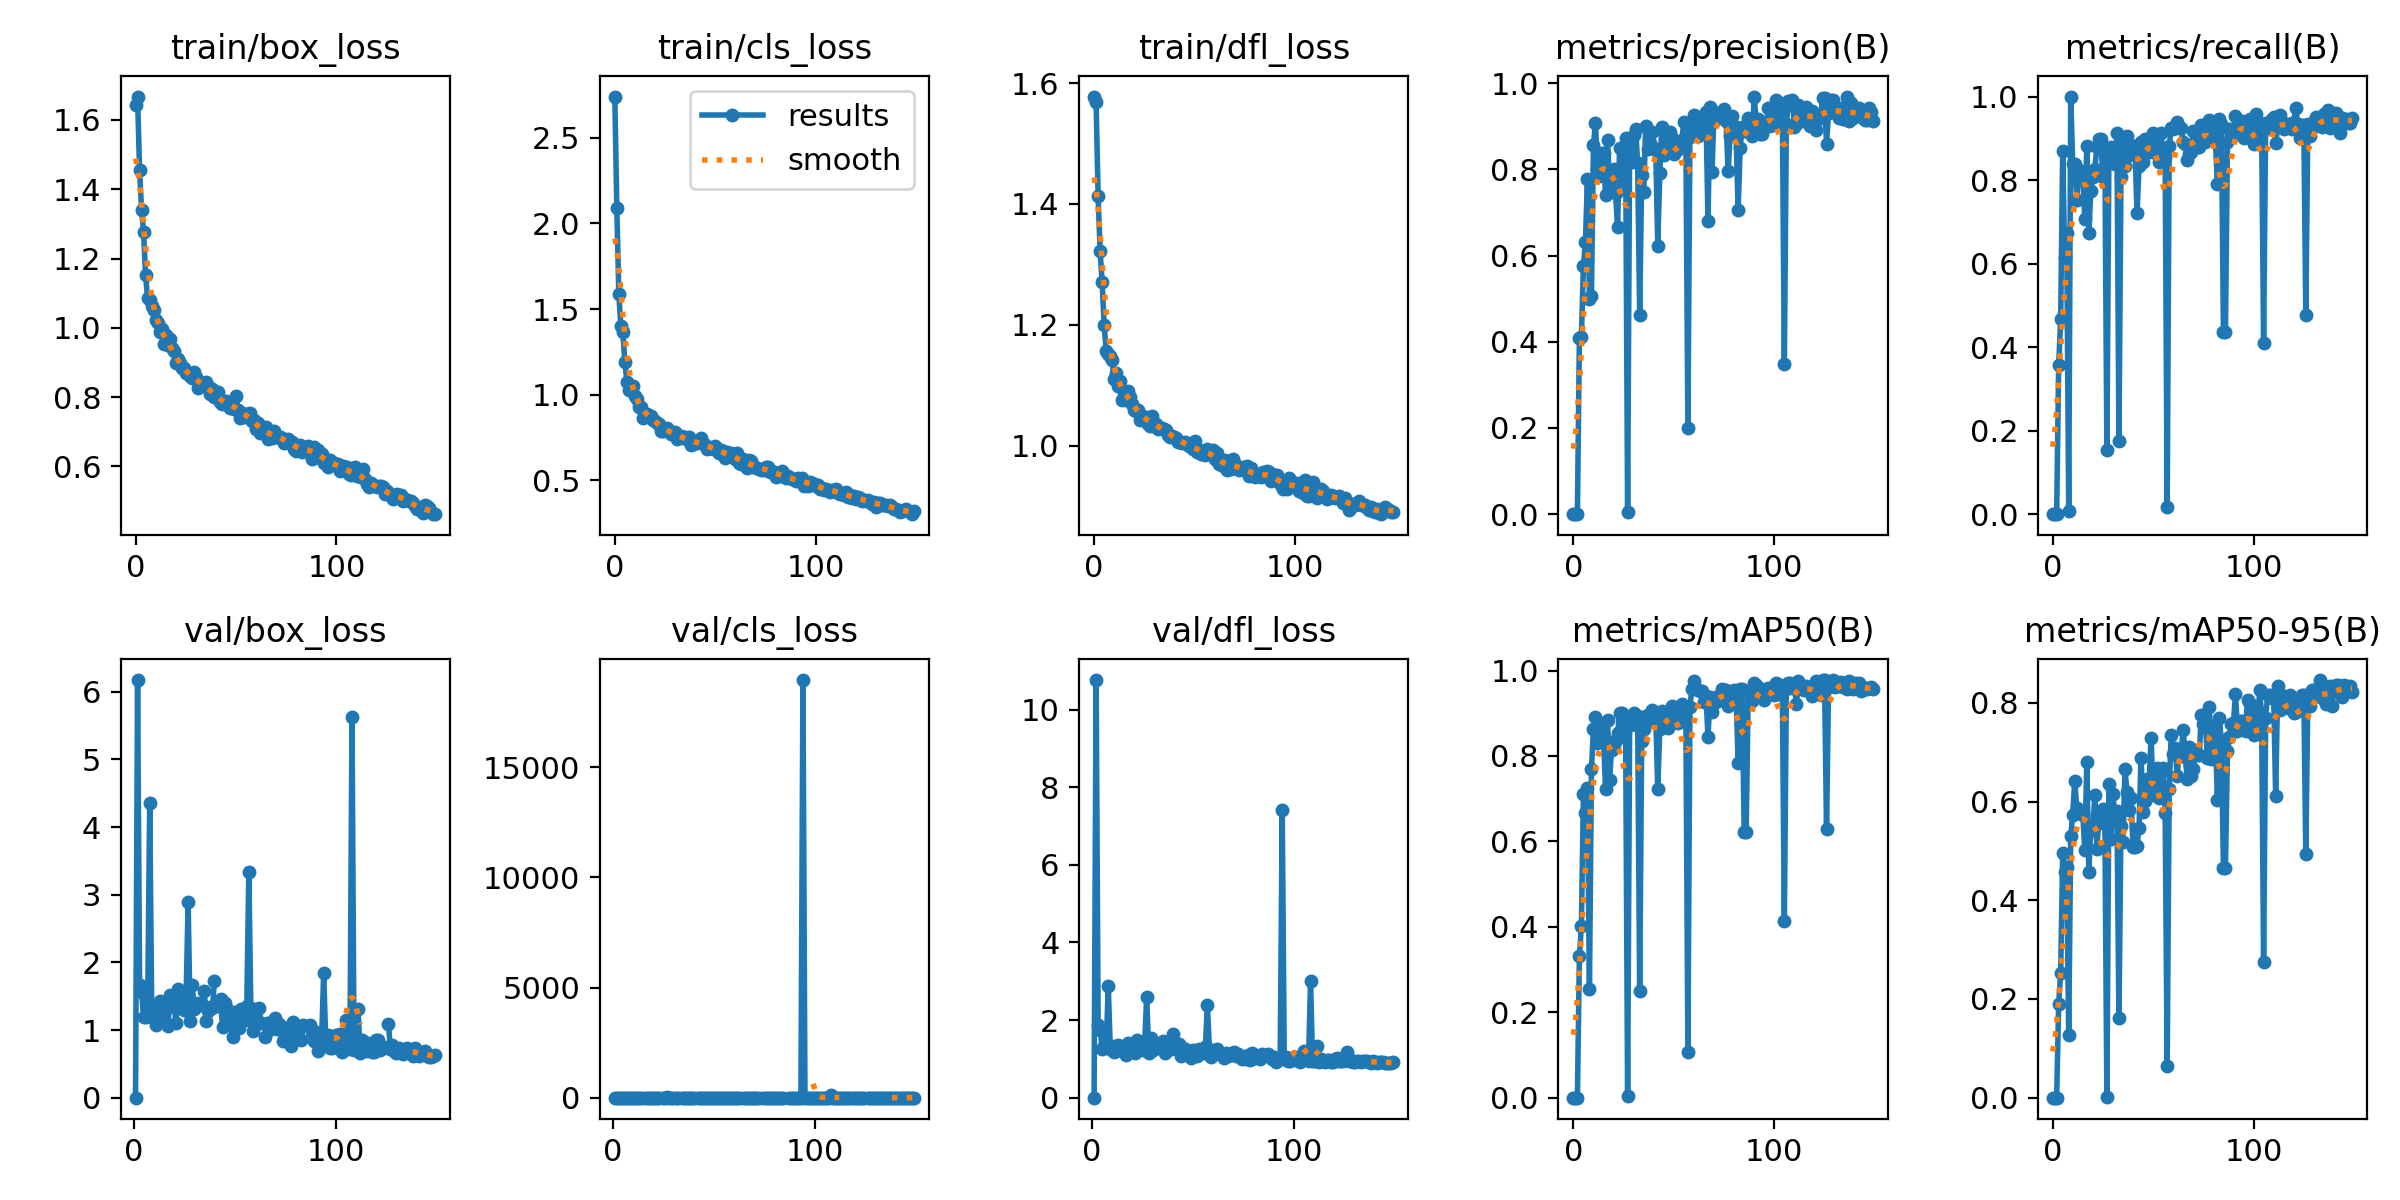

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/kaggle/working


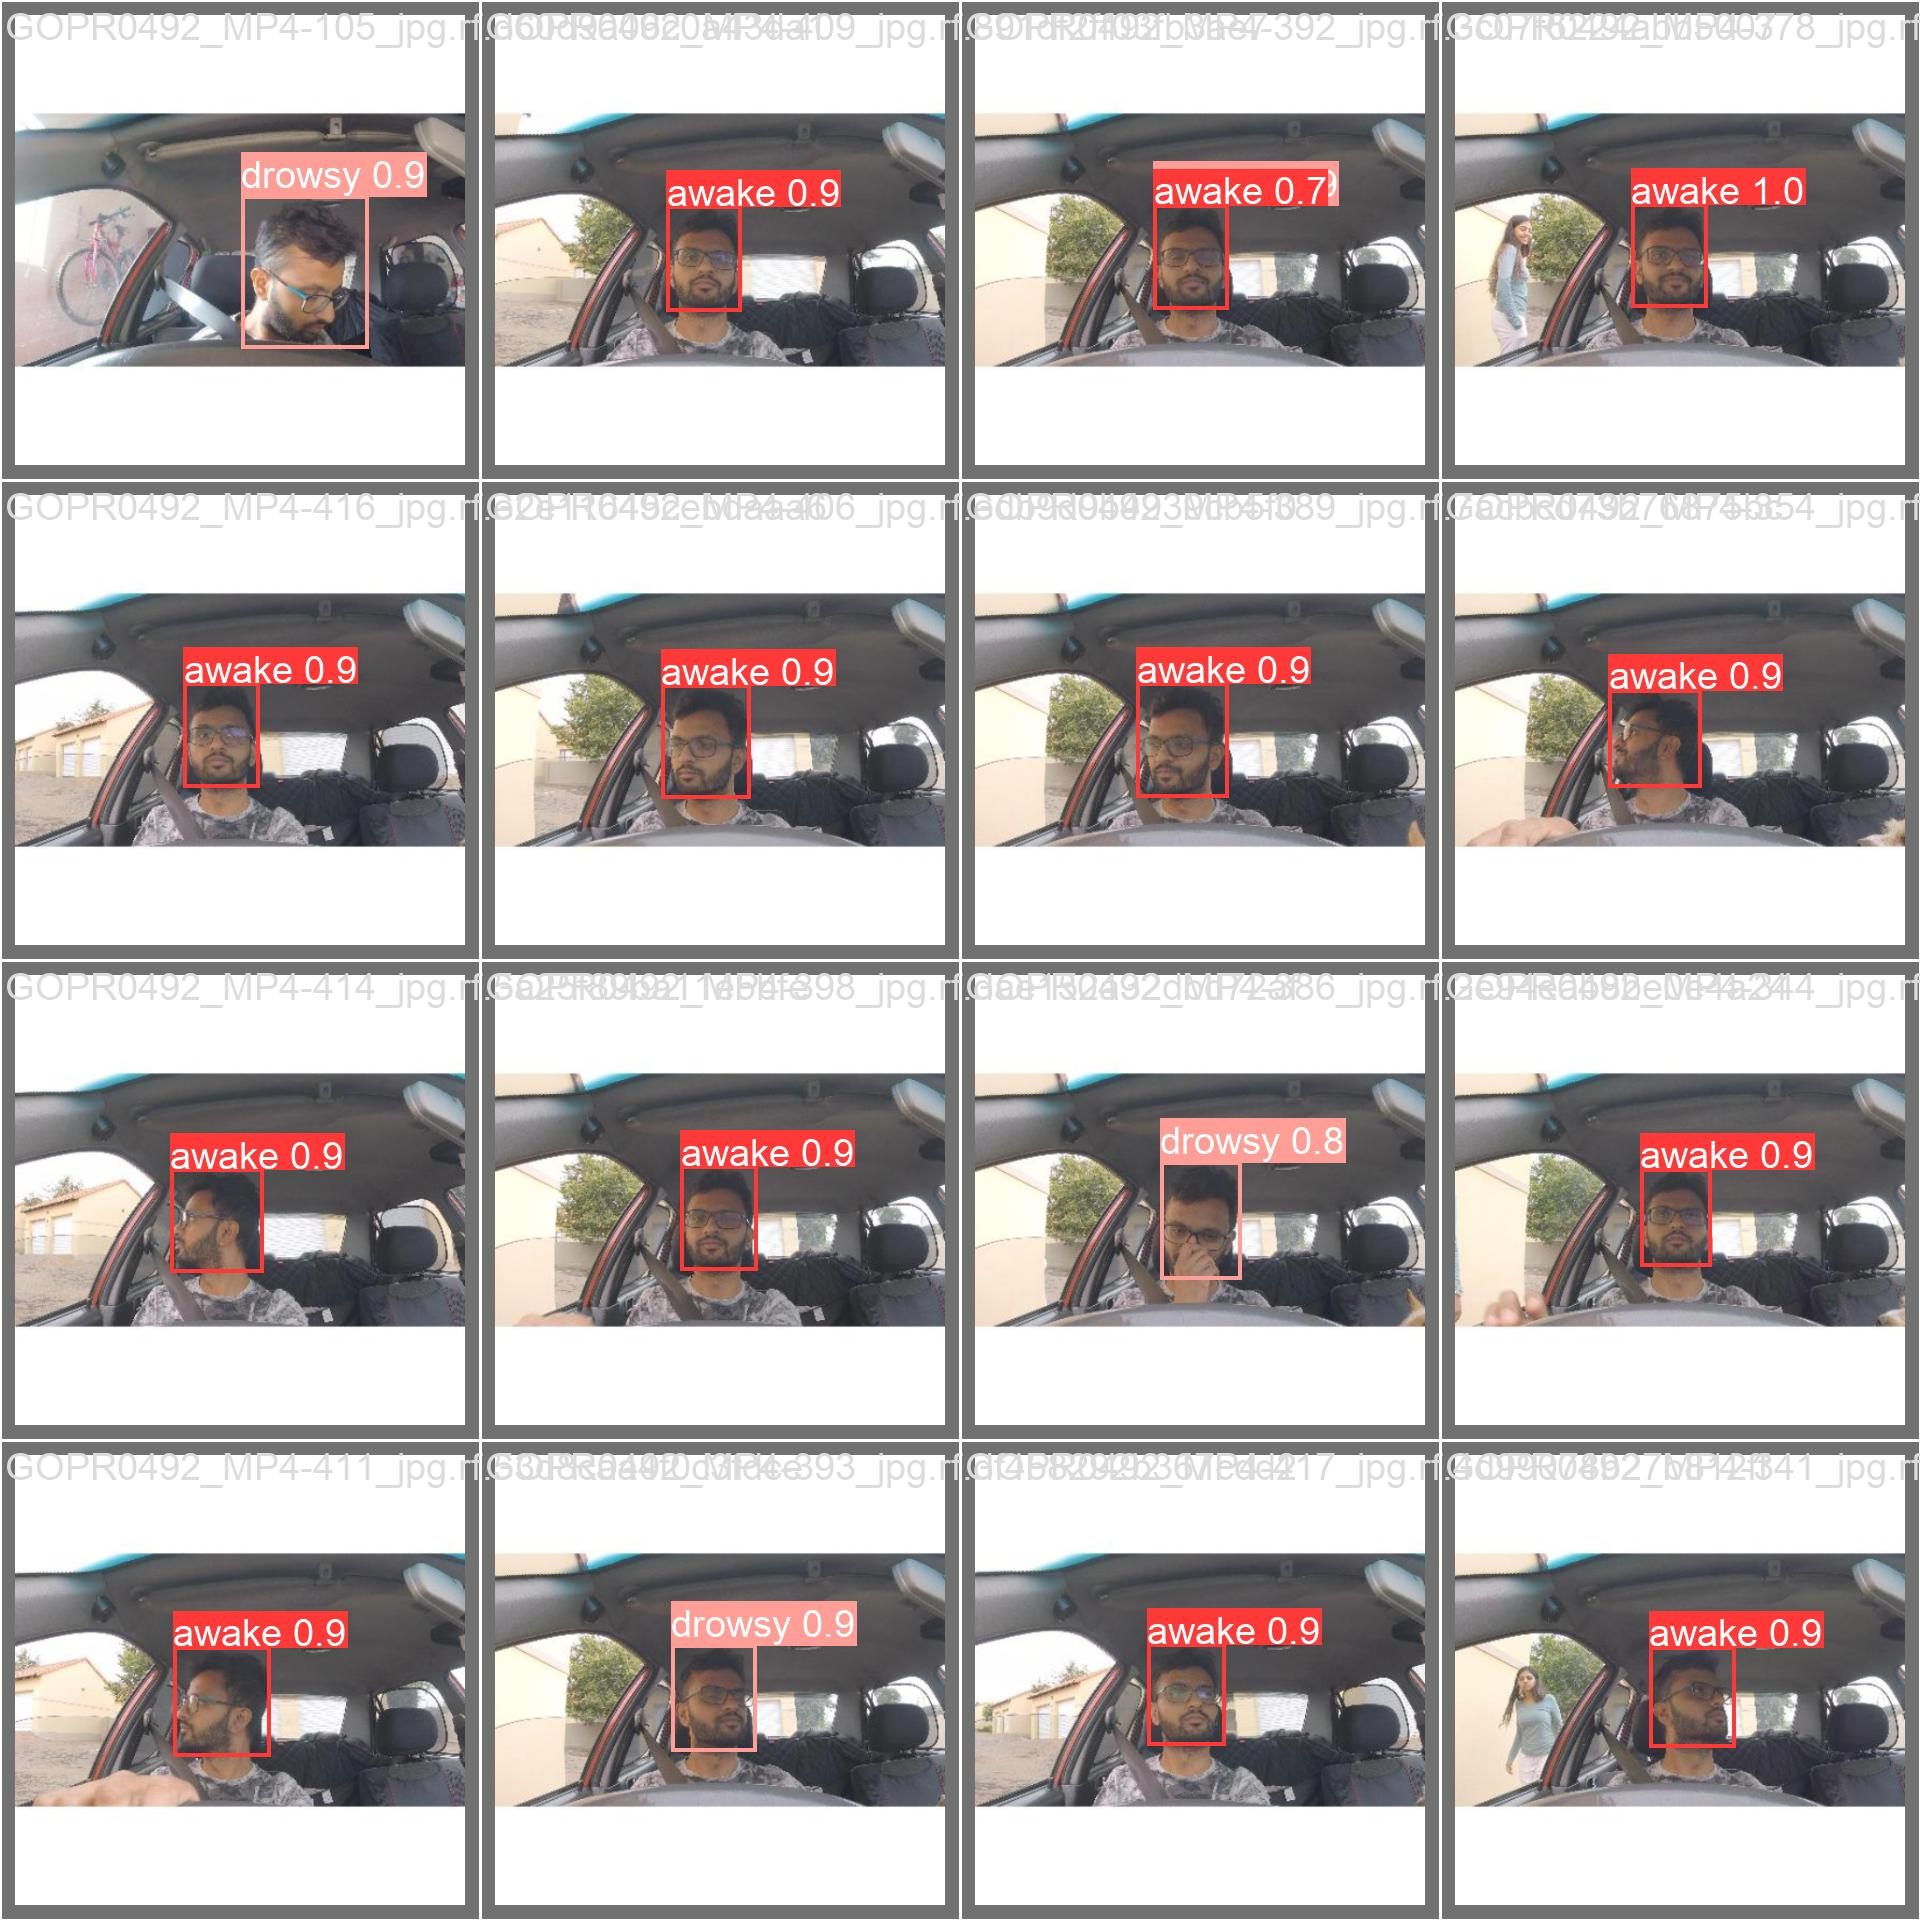

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate

In [13]:
model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')

results = model.val(
    data=new_yaml_file,
    save=True
    )

Ultralytics YOLOv8.0.110 🚀 Python-3.10.10 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients
val: Scanning /kaggle/input/drowsiness-dataset/Drowsiness Detection.v2-augmented-v1.yolov8/valid/labels... 103 images, 0 backgrounds, 0 corrupt: 100%|██████████| 103/103 [00:00<00:00, 296.56it/s]
val: WARNING ⚠️ Cache directory /kaggle/input/drowsiness-dataset/Drowsiness Detection.v2-augmented-v1.yolov8/valid is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.87it/s]
                   all        103        103      0.943      0.932      0.986      0.854
                 awake        103         59      0.934      0.949      0.987      0.861
                drowsy        103         44      0.953      0.916      0.985      0.847
Speed: 2.3ms preprocess, 7.5ms inference, 0.0ms loss, 1.8ms postprocess per image
Results

## Inference

In [14]:
# model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')

# results = model.predict(
#     data=new_yaml_file,
#     conf=0.25,
#     iou=0.45,
#     source=test_images_path,
#     save=True
#     )

### To show on pics

In [15]:
# import glob
# from IPython.display import Image, display

# for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
#       display(Image(filename=image_path, width=600))
#       print("\n")

## To show vid

In [16]:
# from ultralytics import YOLO
# from ultralytics.yolo.v8.detect.predict import DetectionPredictor
# import cv2

# model_path = f'{HOME}/runs/detect/train/weights/best.pt'
# model = YOLO(model_path)

# model.predict( # accepts all forms
#     source="/kaggle/input/drowsiness-dataset/Drowsiness Detection.v2-augmented-v1.yolov8/Drowsiness_1_trim.mp4", # "0" means webcam
#     show=True,
#     conf=0.25,
#     iou=0.45,
#     save=True
#     )

## Export the model

In [17]:
# Export the model
model.export(format='onnx')

Ultralytics YOLOv8.0.110 🚀 Python-3.10.10 torch-2.0.0 CPU

PyTorch: starting from /kaggle/working/runs/detect/train/weights/best.pt with input shape (1, 3, 480, 480) BCHW and output shape(s) (1, 6, 4725) (49.6 MB)

ONNX: starting export with onnx 1.14.0 opset 17...


================ Diagnostic Run torch.onnx.export version 2.0.0 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



ONNX: export success ✅ 2.3s, saved as /kaggle/working/runs/detect/train/weights/best.onnx (98.7 MB)

Export complete (3.4s)
Results saved to /kaggle/working/runs/detect/train/weights
Predict:         yolo predict task=detect model=/kaggle/working/runs/detect/train/weights/best.onnx imgsz=480 
Validate:        yolo val task=detect model=/kaggle/working/runs/detect/train/weights/best.onnx imgsz=480 data=/kaggle/working/custom_data.yaml 
Visualize:       https://netron.app


'/kaggle/working/runs/detect/train/weights/best.onnx'